# Ridge Regression

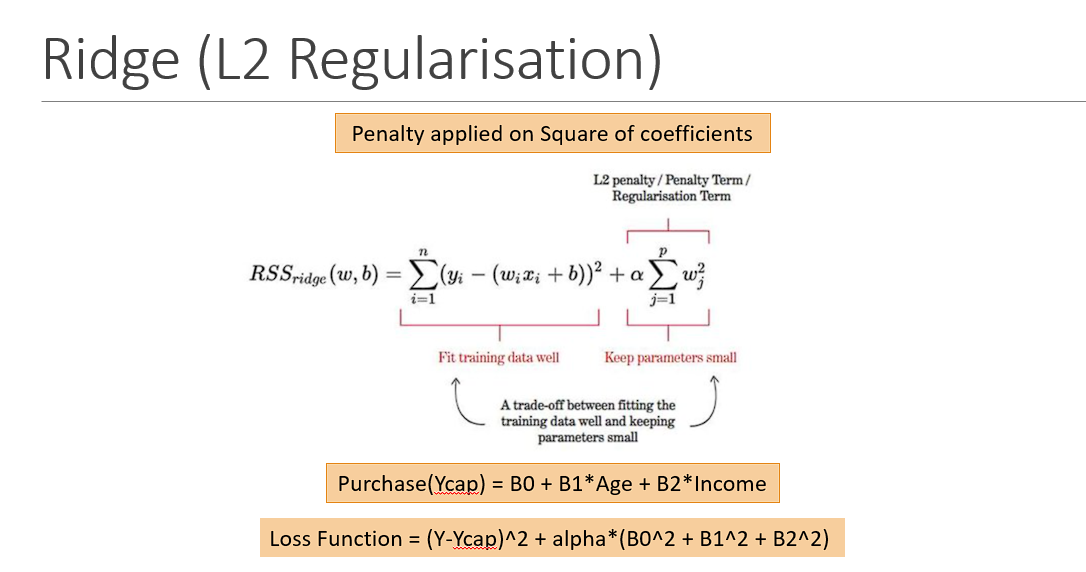

In [1]:
##Penalty is applied on Square of Coefficients

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the dataset

In [3]:
import os
os.chdir('D:/Dipti/DA_DS/Python/Dataframe/')

In [ ]:
import pandas as pd
df = pd.read_csv('Cars93.csv')
df.head()

In [ ]:
df.info()

## Check missing values in dataframe

In [ ]:
s = df.isna().sum()

In [ ]:
s

In [ ]:
s[s>0]

## Seperate X and Y (Weight)

In [ ]:
X = df.drop(columns=['id','Weight'])
Y = df[['Weight']]

In [ ]:
X.head()

In [ ]:
Y.head()

##Seperate Cat and Con features for X

In [ ]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [ ]:
cat

In [ ]:
con

## Create a preprocessing pipeline for X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [ ]:
X_pre = pre.fit_transform(X).toarray()
X_pre

In [ ]:
cols = pre.get_feature_names_out()
cols

In [ ]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

##Train Test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=10)

In [ ]:
xtrain.head()

In [ ]:
ytrain.head()

In [ ]:
xtest.head()

In [ ]:
ytest.head()

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

##create a base model LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

In [ ]:
model.score(xtrain, ytrain)

In [ ]:
model.score(xtest,ytest)

In [ ]:
from PM6func_20oct import evaluate_model
evaluate_model(xtrain, ytrain, xtest, ytest, model)

## creating a ridge model

In [ ]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=4)
rr.fit(xtrain, ytrain)

In [ ]:
rr.score(xtrain, ytrain)

In [ ]:
rr.score(xtest, ytest)

In [ ]:
evaluate_model(xtrain, ytrain, xtest, ytest, rr)

##tuning alpha values

In [ ]:
list(range(1, 11, 2))

In [ ]:
list(range(0.1, 5.5, 0.1))

In [ ]:
import numpy as np

In [ ]:
alphas = np.arange(0.1, 100, 0.1)
alphas

In [ ]:
from sklearn.metrics import mean_squared_error
tr = []
ts = []
for i in alphas:
    # Create and fit the model
    rr = Ridge(alpha=i)
    rr.fit(xtrain, ytrain)
    # predict train and test
    ypred_tr = rr.predict(xtrain)
    ypred_ts = rr.predict(xtest)
    # calculate train and test results
    tr_mse = mean_squared_error(ytrain, ypred_tr)
    ts_mse = mean_squared_error(ytest, ypred_ts)
    # append the results in tr and ts
    tr.append(tr_mse)
    ts.append(ts_mse)

In [ ]:
tr[0:5]

In [ ]:
ts[0:5]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(alphas, tr, label='Train MSE')
plt.plot(alphas, ts, label='Test MSE')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Impact of alpha on train and test MSE')
plt.legend()
plt.show()

In [ ]:
for i in alphas:
    # craete and fit the model 
    rr = Ridge(alpha=i)
    rr.fit(xtrain, ytrain)
    # predict train and test
    ypred_tr = rr.predict(xtrain)
    ypred_ts = rr.predict(xtest)
    # calculate train and test results
    tr_mse = mean_squared_error(ytrain, ypred_tr)
    ts_mse = mean_squared_error(ytest, ypred_ts)
    # check for optimaal alpha
    if tr_mse>=ts_mse:
        opt_alpha = i
        print(f'optimum value of alpha is {opt_alpha}')
        break

In [ ]:
opt_alpha

## Create a final model with optimum alpha

In [ ]:
best_ridge = Ridge(alpha=opt_alpha)
best_ridge.fit (xtrain, ytrain)

In [ ]:
# R2 sccore in train
best_ridge.score(xtrain, ytrain)

In [ ]:
# R2 score in testing
best_ridge.score(xtest, ytest)

In [ ]:
evaluate_model(xtrain, ytrain, xtest, ytest, best_ridge)

## Prediction of out of sample values

In [ ]:
xnew = pd.read_csv('sample.csv')
xnew

In [ ]:
xnew.info()

In [ ]:
xnew.isna().sum()

## While out odf sample preddiction apply pre.transform()

In [ ]:
xnew_pre = pre.transform(xnew).toarray()
xnew_pre

In [ ]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

## Predict the car weights

In [ ]:
preds = best_ridge.predict(xnew_pre)

In [ ]:
preds

## Saving predictions in xnew dataframe

In [ ]:
xnew['Weight_pred']=preds

In [ ]:
xnew

In [ ]:
xnew.to_csv('RidgeResults.csv', index=False)